<a href="https://colab.research.google.com/github/Shashwat26Bhatnagar/Instagram_analysis/blob/main/scRNA_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install scanpy

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 

In [2]:
import scanpy as sc
import numpy as np
import pandas as pd

In [3]:
temp = pd.read_csv("GSM5226600_L22cov_raw_counts.csv")
temp.head(1)

,Unnamed: 0,AGGGTGACACTATGTG-1_27,CGAGTGCCAATACGCT-1_27,ACTTAGGCAGCGGTTC-1_27,AAACCCACATGGCCAC-1_27,TCAAGACTCCCGTAAA-1_27,TCCGAAAGTCTTGAGT-1_27,AACCTTTTCTTAGTTC-1_27,GGAGCAAGTATTAAGG-1_27,TATTGGGGTATGAGAT-1_27,...,GCACGGTCAGAAGTTA-1_27,GGAAGTGGTAGGTTTC-1_27,GGGCGTTGTCGTGGTC-1_27,TTGTGGATCATAGGCT-1_27,CATAAGCGTCGTCAGC-1_27,CCTAAGAAGTTGTCAC-1_27,CGTGAATCATGTCTAG-1_27,GCCGATGAGTAAACGT-1_27,AGGGTGAGTATCAGGG-1_27,ATGGATCAGAGAGCAA-1_27
0,JAGN1,1,1,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
temp.tail(1)

,Unnamed: 0,AGGGTGACACTATGTG-1_27,CGAGTGCCAATACGCT-1_27,ACTTAGGCAGCGGTTC-1_27,AAACCCACATGGCCAC-1_27,TCAAGACTCCCGTAAA-1_27,TCCGAAAGTCTTGAGT-1_27,AACCTTTTCTTAGTTC-1_27,GGAGCAAGTATTAAGG-1_27,TATTGGGGTATGAGAT-1_27,...,GCACGGTCAGAAGTTA-1_27,GGAAGTGGTAGGTTTC-1_27,GGGCGTTGTCGTGGTC-1_27,TTGTGGATCATAGGCT-1_27,CATAAGCGTCGTCAGC-1_27,CCTAAGAAGTTGTCAC-1_27,CGTGAATCATGTCTAG-1_27,GCCGATGAGTAAACGT-1_27,AGGGTGAGTATCAGGG-1_27,ATGGATCAGAGAGCAA-1_27
29683,AL445072.1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
temp.dropna(inplace=True)


temp.to_csv("GSM5226600_L22cov_raw_counts.csv", index=False)

In [6]:
adata = sc.read_csv("GSM5226600_L22cov_raw_counts.csv").T
adata

AnnData object with n_obs × n_vars = 6987 × 29684

In [7]:
from google.colab import drive
drive.mount('/content/drive')
temp.to_csv("/content/drive/My Drive/GSM5226600_L22cov_raw_counts.csv", index=False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
adata = sc.read_csv("/content/drive/My Drive/GSM5226600_L22cov_raw_counts.csv").T
adata

AnnData object with n_obs × n_vars = 6987 × 29684

var are genes while obs are bar code for cells

In [9]:
adata.X.shape

(6987, 29684)

**Doublet removal**

In [10]:
!pip install scvi-tools

**this step is done on individual data on the intergrated data**

In [ ]:
!pip install --user scikit-misc

In [ ]:
!pip list | grep scikit-misc

In [11]:
import scvi

In [12]:
#choosing the genes which are atleast present in atleast 10 cells
sc.pp.filter_genes(adata,min_cells=8)

In [13]:
#choosing highly variable genes
sc.pp.highly_variable_genes(adata,n_top_genes=2000,subset=True,flavor='seurat_v3')



*   The setup_anndata method prepares the AnnData object (adata) for analysis with scVI. It ensures that the necessary data structures and attributes required by scVI are present in adata, such as gene expression counts, normalization, and metadata.
*   scVI stands for "single-cell Variational Inference." It is a probabilistic model based on deep generative modeling techniques. Probabilistic models are powerful tools for analyzing scRNA-seq data because they can capture the inherent uncertainty in gene expression measurements and model complex dependencies between genes and cells.



In [14]:
scvi.model.SCVI.setup_anndata(adata)
vae = scvi.model.SCVI(adata)
vae.train()

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


Epoch 400/400: 100%|██████████| 400/400 [34:29<00:00,  4.98s/it, v_num=1, train_loss_step=377, train_loss_epoch=324]

INFO: `Trainer.fit` stopped: `max_epochs=400` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [34:29<00:00,  5.17s/it, v_num=1, train_loss_step=377, train_loss_epoch=324]


In [17]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(vae, f)

In [15]:
solo = scvi.external.SOLO.from_scvi_model(vae)
solo.train()

INFO     Creating doublets, preparing SOLO model.                                                                  


INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


Epoch 160/400:  40%|████      | 160/400 [02:17<03:26,  1.16it/s, v_num=1, train_loss_step=0.28, train_loss_epoch=0.297]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.298. Signaling Trainer to stop.


In [18]:
df=solo.predict()
df['prediction'] = solo.predict(soft=False)
df

,doublet,singlet,prediction
AGGGTGACACTATGTG-1_27,-0.385840,-1.785631,doublet
CGAGTGCCAATACGCT-1_27,1.122828,-1.655732,doublet
ACTTAGGCAGCGGTTC-1_27,1.354374,-2.129286,doublet
AAACCCACATGGCCAC-1_27,0.447819,-1.498878,doublet
TCAAGACTCCCGTAAA-1_27,0.747760,-1.154638,doublet
...,...,...,...
CCTAAGAAGTTGTCAC-1_27,-3.137192,2.275198,singlet
CGTGAATCATGTCTAG-1_27,-4.068314,2.514421,singlet
GCCGATGAGTAAACGT-1_27,-3.602355,2.386541,singlet
AGGGTGAGTATCAGGG-1_27,-3.818281,2.249671,singlet


removing _0

In [19]:
df.groupby('prediction').count()

,doublet,singlet
prediction,,
doublet,1559,1559
singlet,5428,5428


In [20]:
df['difference'] = df.doublet-df.singlet
df

,doublet,singlet,prediction,difference
AGGGTGACACTATGTG-1_27,-0.385840,-1.785631,doublet,1.399791
CGAGTGCCAATACGCT-1_27,1.122828,-1.655732,doublet,2.778560
ACTTAGGCAGCGGTTC-1_27,1.354374,-2.129286,doublet,3.483659
AAACCCACATGGCCAC-1_27,0.447819,-1.498878,doublet,1.946697
TCAAGACTCCCGTAAA-1_27,0.747760,-1.154638,doublet,1.902398
...,...,...,...,...
CCTAAGAAGTTGTCAC-1_27,-3.137192,2.275198,singlet,-5.412390
CGTGAATCATGTCTAG-1_27,-4.068314,2.514421,singlet,-6.582735
GCCGATGAGTAAACGT-1_27,-3.602355,2.386541,singlet,-5.988896
AGGGTGAGTATCAGGG-1_27,-3.818281,2.249671,singlet,-6.067952


In [21]:
import seaborn as sns

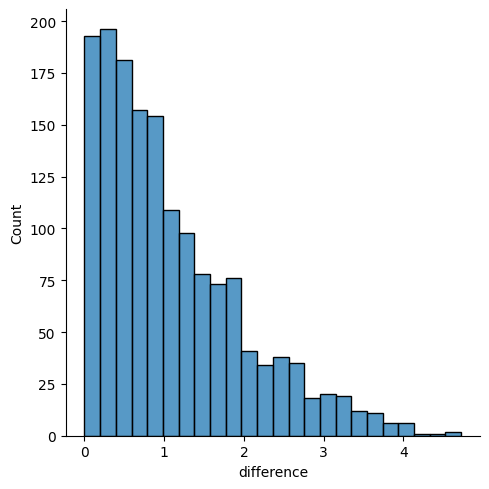

In [22]:
sns.displot(df[df.prediction=='doublet'],x='difference')

In [23]:
#choosing only the cells predicted doublet and difference above 1
doublets = df[(df.prediction=='doublet')&(df.difference>1)]
doublets

,doublet,singlet,prediction,difference
AGGGTGACACTATGTG-1_27,-0.385840,-1.785631,doublet,1.399791
CGAGTGCCAATACGCT-1_27,1.122828,-1.655732,doublet,2.778560
ACTTAGGCAGCGGTTC-1_27,1.354374,-2.129286,doublet,3.483659
AAACCCACATGGCCAC-1_27,0.447819,-1.498878,doublet,1.946697
TCAAGACTCCCGTAAA-1_27,0.747760,-1.154638,doublet,1.902398
...,...,...,...,...
CTACGGGGTGCCCGTA-1_27,0.294837,-1.521348,doublet,1.816186
AGTCACACATTGAGGG-1_27,0.098310,-0.974953,doublet,1.073263
CTCACTGCACATATCG-1_27,0.272896,-1.015294,doublet,1.288190
GTAGAGGCAGACTGCC-1_27,0.310454,-1.011322,doublet,1.321776


In [24]:
adata = sc.read_csv('GSM5226600_L22cov_raw_counts.csv').T

In [25]:
adata.obs['doublet'] = adata.obs.index.isin(doublets.index)
adata.obs

,doublet
AGGGTGACACTATGTG-1_27,True
CGAGTGCCAATACGCT-1_27,True
ACTTAGGCAGCGGTTC-1_27,True
AAACCCACATGGCCAC-1_27,True
TCAAGACTCCCGTAAA-1_27,True
...,...
CCTAAGAAGTTGTCAC-1_27,False
CGTGAATCATGTCTAG-1_27,False
GCCGATGAGTAAACGT-1_27,False
AGGGTGAGTATCAGGG-1_27,False


In [26]:
adata = adata[~adata.obs.doublet]

In [27]:
adata
#now all the doublets has been removed

View of AnnData object with n_obs × n_vars = 6320 × 29684
    obs: 'doublet'

**PREPROCESSING**

In [ ]:
#LABEL genes (mitochondiral genes)

In [28]:
adata.var

""
JAGN1
IL17RE
IL17RC
CRELD1
AC018809.1
...
VN1R2
AL031676.1
SMIM34A
AL050402.1


In [64]:
adata.var['mt']=adata.var.index.str.startswith('MT-')

In [30]:
adata.var

,mt
JAGN1,False
IL17RE,False
IL17RC,False
CRELD1,False
AC018809.1,False
...,...
VN1R2,False
AL031676.1,False
SMIM34A,False
AL050402.1,False


In [ ]:
#handling the ribosomal genes

In [65]:
ribo_url = "http://software.broadinstitute.org/gsea/msigdb/download_geneset.jsp?geneSetName=KEGG_RIBOSOME&fileType=txt"


In [66]:
ribo_genes = pd.read_table(ribo_url,skiprows=2,header=None)
ribo_genes

,0
0,FAU
1,MRPL13
2,RPL10
3,RPL10A
4,RPL10L
...,...
83,RPS9
84,RPSA
85,RSL24D1
86,RSL24D1P11


In [33]:
ribo_genes[0].values

array(['FAU', 'MRPL13', 'RPL10', 'RPL10A', 'RPL10L', 'RPL11', 'RPL12',
       'RPL13', 'RPL13A', 'RPL14', 'RPL15', 'RPL17', 'RPL18', 'RPL18A',
       'RPL19', 'RPL21', 'RPL22', 'RPL22L1', 'RPL23', 'RPL23A', 'RPL24',
       'RPL26', 'RPL26L1', 'RPL27', 'RPL27A', 'RPL28', 'RPL29', 'RPL3',
       'RPL30', 'RPL31', 'RPL32', 'RPL34', 'RPL35', 'RPL35A', 'RPL36',
       'RPL36A', 'RPL36AL', 'RPL37', 'RPL37A', 'RPL38', 'RPL39', 'RPL3L',
       'RPL4', 'RPL41', 'RPL5', 'RPL6', 'RPL7', 'RPL7A', 'RPL8', 'RPL9',
       'RPLP0', 'RPLP1', 'RPLP2', 'RPS10', 'RPS11', 'RPS12', 'RPS13',
       'RPS15', 'RPS15A', 'RPS16', 'RPS17', 'RPS18', 'RPS19', 'RPS2',
       'RPS20', 'RPS21', 'RPS23', 'RPS24', 'RPS25', 'RPS26', 'RPS27',
       'RPS27A', 'RPS27L', 'RPS28', 'RPS29', 'RPS3', 'RPS3A', 'RPS4X',
       'RPS4Y1', 'RPS5', 'RPS6', 'RPS7', 'RPS8', 'RPS9', 'RPSA',
       'RSL24D1', 'RSL24D1P11', 'UBA52'], dtype=object)

In [67]:
adata.var['ribo'] = adata.var_names.isin(ribo_genes[0].values)

In [36]:
adata.var

,mt,ribo
JAGN1,False,False
IL17RE,False,False
IL17RC,False,False
CRELD1,False,False
AC018809.1,False,False
...,...,...
VN1R2,False,False
AL031676.1,False,False
SMIM34A,False,False
AL050402.1,False,False


In [37]:
adata.obs

,doublet
AACCTTTTCTTAGTTC-1_27,False
GGAGCAAGTATTAAGG-1_27,False
AGAGAGCCAACTGCCG-1_27,False
GCTGAATTCCATTTGT-1_27,False
AACGAAACATAATCCG-1_27,False
...,...
CCTAAGAAGTTGTCAC-1_27,False
CGTGAATCATGTCTAG-1_27,False
GCCGATGAGTAAACGT-1_27,False
AGGGTGAGTATCAGGG-1_27,False


In [68]:
#QC matrix
sc.pp.calculate_qc_metrics(adata,qc_vars=['mt','ribo'],percent_top = None, log1p=False,inplace =True)

In [69]:
adata.obs.sort_values('total_counts')

,Sample,_scvi_batch,_scvi_labels,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
GGCTGTGTCTAACGCA-1_1,GGCTGTGTCTAACGCA-1_1,0,0,265,838.736938,51.613163,6.153677,34.942535,4.166090
ATTCTACCACTTGTGA-1_3,ATTCTACCACTTGTGA-1_3,0,0,266,898.715027,3.140867,0.349484,0.000000,0.000000
TCCGAAAAGTCAAGCG-1_3,TCCGAAAAGTCAAGCG-1_3,0,0,266,902.305176,41.491135,4.598348,42.750546,4.737925
CGTTCTGAGTAATCCC-1_3,CGTTCTGAGTAATCCC-1_3,0,0,267,917.988831,37.798313,4.117514,102.403389,11.155189
TCAGCCTTCAGGTAAA-1_3,TCAGCCTTCAGGTAAA-1_3,0,0,270,918.551575,12.313871,1.340575,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
TCGAAGTCACACACTA-1_3,TCGAAGTCACACACTA-1_3,0,0,4995,4510.186035,30.595161,0.678357,7.536835,0.167107
TAGGTACCATGGCCAC-1_1,TAGGTACCATGGCCAC-1_1,0,0,6243,4657.599609,20.648983,0.443340,16.692469,0.358392
AGGCCACAGAGTCACG-1_1,AGGCCACAGAGTCACG-1_1,0,0,5223,4712.292480,38.943306,0.826420,39.146393,0.830729
CACTGAAGTCGAAGCA-1_1,CACTGAAGTCGAAGCA-1_1,0,0,5148,4719.704590,39.042839,0.827231,39.140335,0.829296


In [40]:
sc.pp.filter_cells(adata,min_genes=300)

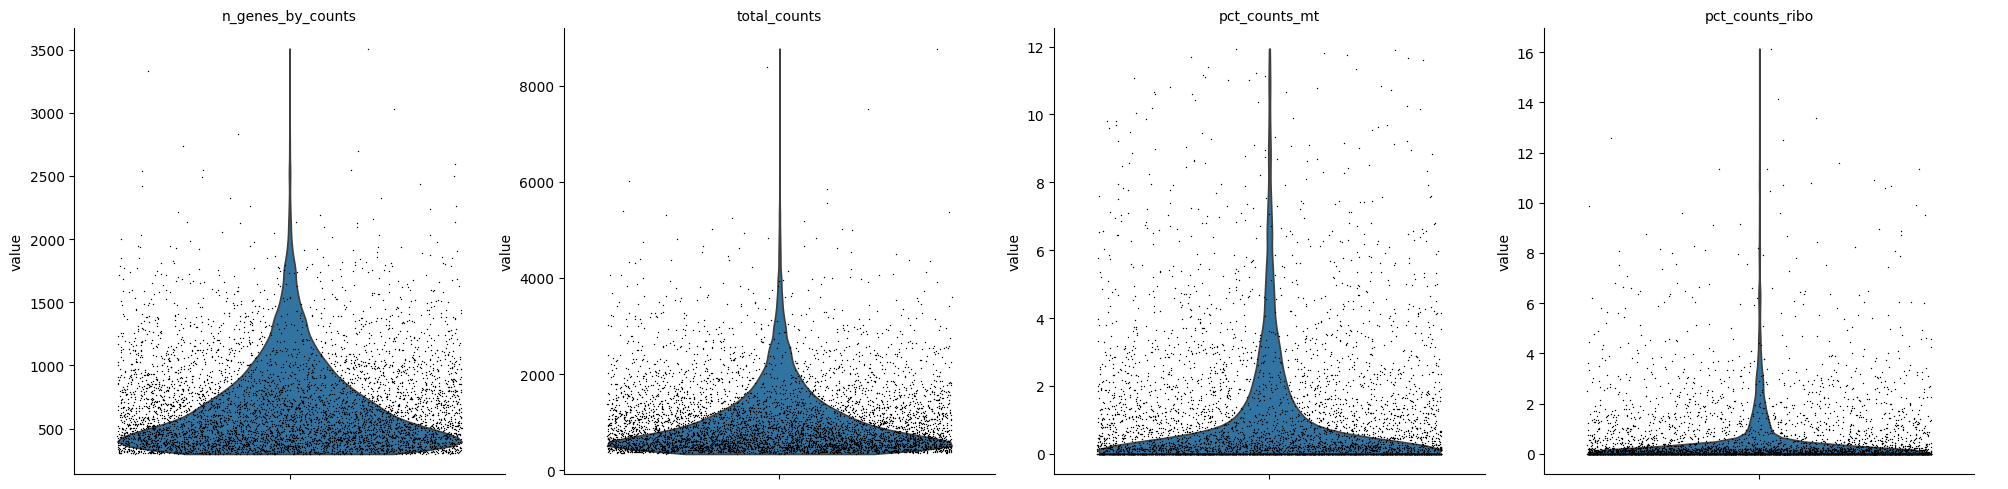

In [41]:
#plotting QC metrics
sc.pl.violin(adata,['n_genes_by_counts','total_counts','pct_counts_mt','pct_counts_ribo'],jitter=0.4,multi_panel=True)

In [42]:
upper_lim = np.quantile(adata.obs.n_genes_by_counts.values, .98)


In [43]:
adata = adata[adata.obs.pct_counts_mt<20]

In [44]:
adata = adata[adata.obs.pct_counts_ribo<2]

**Nomalization**

In [45]:
#Due mitigate the effect of variance across the cell types and also within the same cell type
adata.X.sum(axis=1)

array([8768., 7511., 6016., ...,  360.,  373.,  351.], dtype=float32)

In [46]:
#Normalizing the sum
sc.pp.normalize_total(adata,target_sum=1e4)

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_normalization.py:206: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [47]:
adata.X.sum(axis=1)

array([10000.   ,  9999.999, 10000.001, ..., 10000.   , 10000.   ,
        9999.999], dtype=float32)

In [48]:
sc.pp.log1p(adata)#change the log counts

In [49]:
adata.X.sum(axis=1)

array([3700.4336, 3656.1309, 3649.2927, ..., 1039.4563, 1081.1995,
       1054.2233], dtype=float32)

In [50]:
adata.raw = adata

**Clustering**

In [51]:
sc.pp.highly_variable_genes(adata,n_top_genes=2000)

In [13]:
type(adata)

anndata._core.anndata.AnnData

In [52]:
adata.var

,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,highly_variable,means,dispersions,dispersions_norm
JAGN1,False,False,16,0.002690,99.746835,17.0,False,1.472234e-02,2.257576,-0.575049
IL17RE,False,False,32,0.005063,99.493671,32.0,False,4.118584e-02,2.637062,0.304957
IL17RC,False,False,54,0.008703,99.145570,55.0,False,6.887103e-02,2.331187,-0.404349
CRELD1,False,False,111,0.018196,98.243671,115.0,False,1.640020e-01,2.643772,0.320517
AC018809.1,False,False,0,0.000000,100.000000,0.0,False,1.000000e-12,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
VN1R2,False,False,2,0.000316,99.968354,2.0,False,4.599604e-03,2.528964,0.054286
AL031676.1,False,False,1,0.000158,99.984177,1.0,False,2.477141e-04,0.286216,-5.146523
SMIM34A,False,False,1,0.000158,99.984177,1.0,False,1.078150e-03,1.757358,-1.735027
AL050402.1,False,False,1,0.000158,99.984177,1.0,False,1.726282e-03,2.228406,-0.642693


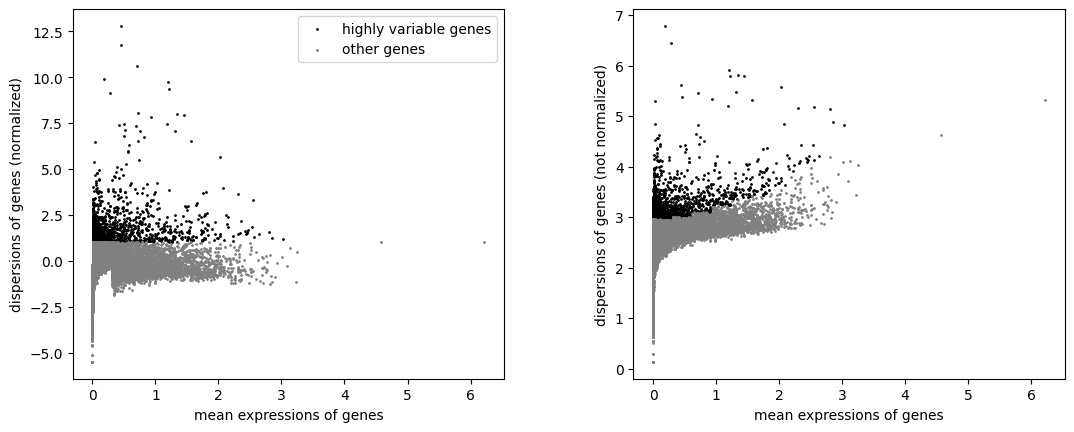

In [53]:
sc.pl.highly_variable_genes(adata)

In [54]:
adata = adata[:,adata.var.highly_variable]

In [55]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt', 'pct_counts_ribo'])

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_simple.py:641: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [57]:
sc.tl.pca(adata, svd_solver='arpack')

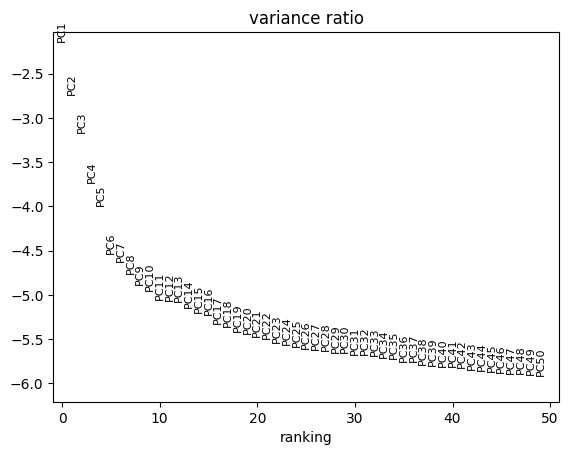

In [58]:
sc.pl.pca_variance_ratio(adata, log=True, n_pcs = 50)

In [59]:
#finding the elbow inorder to find the minimum number of pc which contributes to the varinace by doing so we can remove the remaingn ones
sc.pp.neighbors(adata, n_pcs = 30)

In [60]:
sc.tl.umap(adata)

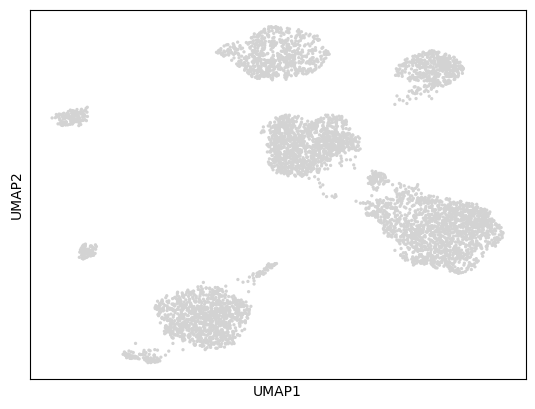

In [61]:
sc.pl.umap(adata)

In [ ]:
#assign clusttering by leidenalg

In [ ]:
!pip3 install igraph

In [ ]:
!pip3 install leidenalg

In [62]:
sc.tl.leiden(adata, resolution = 0.5)
#resolution closer to 1 = more clustters
#resolution closer to 0 = fewer clustters

<ipython-input-62-6a4886b7521b>:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution = 0.5)


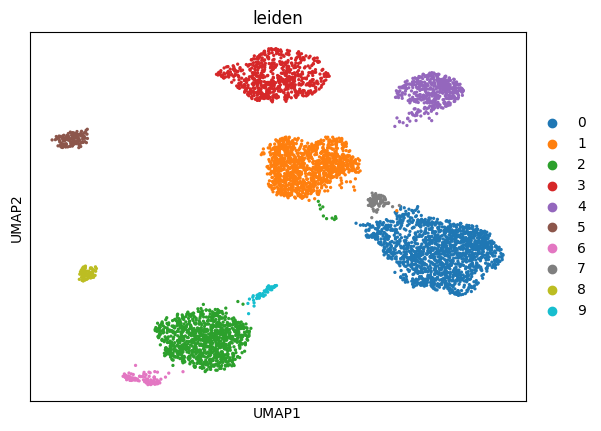

In [63]:
sc.pl.umap(adata,color=['leiden'])

**Integration**

In [64]:
def pp(csv_path):
    adata = sc.read_csv(csv_path).T
    sc.pp.filter_genes(adata, min_cells = 10)
    sc.pp.highly_variable_genes(adata, n_top_genes = 2000, subset = True, flavor = 'seurat_v3')
    scvi.model.SCVI.setup_anndata(adata)
    vae = scvi.model.SCVI(adata)
    vae.train()
    solo = scvi.external.SOLO.from_scvi_model(vae)
    solo.train()
    df = solo.predict()
    df['prediction'] = solo.predict(soft = False)
    df.index = df.index.map(lambda x: x[:-2])
    df['dif'] = df.doublet - df.singlet
    doublets = df[(df.prediction == 'doublet') & (df.dif > 1)]

    adata = sc.read_csv(csv_path).T
    adata.obs['Sample'] = csv_path.split('_')[2] #'raw_counts/GSM5226574_C51ctr_raw_counts.csv'

    adata.obs['doublet'] = adata.obs.index.isin(doublets.index)
    adata = adata[~adata.obs.doublet]


    sc.pp.filter_cells(adata, min_genes=200) #get rid of cells with fewer than 200 genes
    #sc.pp.filter_genes(adata, min_cells=3) #get rid of genes that are found in fewer than 3 cells
    adata.var['mt'] = adata.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
    adata.var['ribo'] = adata.var_names.isin(ribo_genes[0].values)
    sc.pp.calculate_qc_metrics(adata, qc_vars=['mt', 'ribo'], percent_top=None, log1p=False, inplace=True)
    upper_lim = np.quantile(adata.obs.n_genes_by_counts.values, .98)
    adata = adata[adata.obs.n_genes_by_counts < upper_lim]
    adata = adata[adata.obs.pct_counts_mt < 20]
    adata = adata[adata.obs.pct_counts_ribo < 2]

    return adata

In [1]:
import pickle

In [3]:
import os
import scanpy as sc

# Define the path to the main folder containing all the CSV files
main_folder_path = '/content/drive/MyDrive/data'

# Initialize an empty list to store the AnnData objects
out = []

# Loop through each item (file or folder) within the main folder
for item_name in os.listdir(main_folder_path):
    item_path = os.path.join(main_folder_path, item_name)
    # Check if the item is a file and ends with '.csv'
    if os.path.isfile(item_path) and item_name.endswith('.csv'):
        adata = sc.read_csv(item_path).T
        out.append(adata)
with open('out.pkl', 'wb') as f:
    pickle.dump(out, f)

In [2]:
# Load the 'out' variable from the file
with open('out.pkl', 'rb') as f:
    out = pickle.load(f)


In [3]:
out=out[:3]

In [7]:
type(out)

anndata._core.anndata.AnnData

In [4]:
import scanpy as sc

In [51]:
adata = sc.concat(out)

In [52]:
sc.pp.filter_genes(adata, min_cells = 10)


In [53]:
from scipy.sparse import csr_matrix


In [54]:
adata.X = csr_matrix(adata.X)

In [55]:
adata.write_h5ad('combined.h5ad')


In [10]:
import scanpy as sc
import scvi
import seaborn as sns
import numpy as np
import pandas as pd

In [46]:
sample_names = adata.obs.index.tolist()
sample_names

['TAGGTACCATGGCCAC-1_1',
 'ATTCACTGTAACAGGC-1_1',
 'TAACTTCCAACCACGC-1_1',
 'TTGGGTACACGACAAG-1_1',
 'AGGCCACAGAGTCACG-1_1',
 'CACTGAAGTCGAAGCA-1_1',
 'ACTGATGTCTGCACCT-1_1',
 'TTACCGCCACTCAGAT-1_1',
 'TTGGTTTTCCTAGCTC-1_1',
 'TGGGAAGTCAGTGATC-1_1',
 'CCACGAGTCTCTTAAC-1_1',
 'ACTTCCGCACAACGCC-1_1',
 'GGGAAGTAGCGACCCT-1_1',
 'TGGTAGTTCCCGTGTT-1_1',
 'CGCATAACATGCCGGT-1_1',
 'TCTATCACAAGGCTTT-1_1',
 'ATCCACCAGAGGTATT-1_1',
 'TAACGACAGATGACCG-1_1',
 'TCTTAGTGTATGAGGC-1_1',
 'CACTTCGCAGTACTAC-1_1',
 'GTCAAACAGAACGTGC-1_1',
 'GCAACCGAGGGCAGGA-1_1',
 'CATACTTTCATCACTT-1_1',
 'AAGAACATCGGATTAC-1_1',
 'GGGTATTGTACGATGG-1_1',
 'CTGTAGATCAACGTGT-1_1',
 'GTCATTTGTATCTCGA-1_1',
 'CCTTGTGCAGAGGGTT-1_1',
 'AAGTTCGCAACACGTT-1_1',
 'TCATTCACAAATCAAG-1_1',
 'TCCATGCCAACGACTT-1_1',
 'TCCTTCTCAGTTTCAG-1_1',
 'TGTGAGTCAAATGATG-1_1',
 'AAACGAAGTACAGAGC-1_1',
 'CAACCAAAGTATTCCG-1_1',
 'CTTCTCTCAGAGACTG-1_1',
 'TACAACGGTGGCTGAA-1_1',
 'AACGGGACATGCCGGT-1_1',
 'AACCAACGTTGGGAAC-1_1',
 'TATATCCAGCGTCAGA-1_1',


In [56]:
adata.obs['Sample'] = adata.obs.index.tolist()

In [57]:
adata.obs

,Sample
TAGGTACCATGGCCAC-1_1,TAGGTACCATGGCCAC-1_1
ATTCACTGTAACAGGC-1_1,ATTCACTGTAACAGGC-1_1
TAACTTCCAACCACGC-1_1,TAACTTCCAACCACGC-1_1
TTGGGTACACGACAAG-1_1,TTGGGTACACGACAAG-1_1
AGGCCACAGAGTCACG-1_1,AGGCCACAGAGTCACG-1_1
...,...
CCTTCAGGTGGGTATG-1_3,CCTTCAGGTGGGTATG-1_3
ATGAGGGTCATTTACC-1_3,ATGAGGGTCATTTACC-1_3
GCACTAAGTGAGGATC-1_3,GCACTAAGTGAGGATC-1_3
GACCCAGGTAACGCGA-1_3,GACCCAGGTAACGCGA-1_3


In [58]:
adata.obs.groupby('Sample').count()

""
Sample
AAACCCAAGATAGCTA-1_3
AAACCCAAGCGCCCAT-1_7
AAACCCAAGCTCTGTA-1_1
AAACCCAAGGTCCAGA-1_7
AAACCCAAGTACAACA-1_1
...
TTTGTTGGTTGCCTAA-1_1
TTTGTTGTCGGTATGT-1_7
TTTGTTGTCGTCACCT-1_7


In [59]:
sc.pp.filter_genes(adata, min_cells = 100)

In [60]:
adata.layers['counts'] = adata.X.copy()


In [61]:
sc.pp.normalize_total(adata, target_sum = 1e4)
sc.pp.log1p(adata)
adata.raw = adata

In [62]:
adata.obs.head()

,Sample
TAGGTACCATGGCCAC-1_1,TAGGTACCATGGCCAC-1_1
ATTCACTGTAACAGGC-1_1,ATTCACTGTAACAGGC-1_1
TAACTTCCAACCACGC-1_1,TAACTTCCAACCACGC-1_1
TTGGGTACACGACAAG-1_1,TTGGGTACACGACAAG-1_1
AGGCCACAGAGTCACG-1_1,AGGCCACAGAGTCACG-1_1


In [70]:
scvi.model.SCVI.setup_anndata(
    adata,
    layer="counts",
    categorical_covariate_keys=["Sample"],  # Use the extracted sample names
    continuous_covariate_keys=['pct_counts_mt', 'total_counts', 'pct_counts_ribo']
)

/usr/local/lib/python3.10/dist-packages/scvi/data/fields/_arraylike_field.py:407: UserWarning: Category 0 in adata.obs['Sample'] has fewer than 3 cells. Models may not train properly.
  mapping = _make_column_categorical(df, key, key, categorical_dtype=categorical_dtype)


In [71]:
model = scvi.model.SCVI(adata)

In [ ]:
model.train()

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


Epoch 75/400:  18%|█▊        | 74/400 [2:05:56<9:19:51, 103.04s/it, v_num=1, train_loss_step=2.93e+3, train_loss_epoch=2.94e+3]

In [ ]:
import pickle
with open('model1.pkl','wb') as f:
  pickle.dump(model,f)

In [ ]:
adata.obsm['X_scVI'] = model.get_latent_representation()
adata.layers['scvi_normalized'] = model.get_normalized_expression(library_size = 1e4)
sc.pp.neighbors(adata, use_rep = 'X_scVI')

In [ ]:
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution = 0.5)

In [ ]:
sc.pl.umap(adata, color = ['leiden', 'Sample'], frameon = False)

**Find markers/labels cell types**

In [ ]:
sc.tl.leiden(adata, resolution = 1)
sc.tl.rank_genes_groups(adata, 'leiden')

In [ ]:
markers = sc.get.rank_genes_groups_df(adata, None)
markers = markers[(markers.pvals_adj < 0.05) & (markers.logfoldchanges > .5)]
markers

In [ ]:
markers_scvi = model.differential_expression(groupby = 'leiden')
markers_scvi

In [ ]:
markers_scvi = markers_scvi[(markers_scvi['is_de_fdr_0.05']) & (markers_scvi.lfc_mean > .5)]
markers_scvi

In [ ]:
sc.pl.umap(adata, color = ['leiden'], frameon = False, legend_loc = "on data")

In [ ]:
sc.pl.umap(adata, color = ['EPCAM', 'MUC1'], frameon = False, layer = 'scvi_normalized', vmax = 5)

In [ ]:
cell_type = {"0":"Macrophage",
"1":"Fibroblast",
"2":"CD4+ T-cell",
"3":"AT2",
"4":"AT1",
"5":"CD8+ T-cell",
"6":"Endothelial cell",
"7":"Plasma cell",
"8":"Macrophage",
"9":"AT2",
"10":"Fibroblast",
"11":"Fibroblast",
"12":"Macrophage",
"13":"Macrophage",
"14":"Airway epithelial",
"15":"Airway epithelial",
"16":"Monocyte",
"17":"Airway epithelial",
"18":"B-cell",
"19":"Aerocyte",
"20":"Airway epithelial",
"21":"Smooth muscle cell",
"22":"Cycling T/NK",
"23":"Neuronal cell",
"24":"Denditic cell",
"25":"Pericyte",
"26":"Fibroblast",
"27":"Erythroid-like",
"28":"Macrophage"
}

In [ ]:
adata.obs['cell type'] = adata.obs.leiden.map(cell_type)
sc.pl.umap(adata, color = ['cell type'], frameon = False)

In [ ]:
adata.uns['scvi_markers'] = markers_scvi
adata.uns['markers'] = markers
adata.write_h5ad('integrated.h5ad')
model.save('model.model')

**Analysis**

In [ ]:
import scanpy as sc
import scvi
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
adata = sc.read_h5ad('integrated.h5ad')

In [ ]:
adata.obs.Sample.unique().tolist()

In [ ]:
def map_condition(x):
    if 'cov' in x:
        return 'COVID19'
    else:
        return 'control'
adata.obs['condition'] = adata.obs.Sample.map(map_condition)
adata.obs

In [ ]:
num_tot_cells = adata.obs.groupby(['Sample']).count()
num_tot_cells = dict(zip(num_tot_cells.index, num_tot_cells.doublet))
num_tot_cells

In [ ]:
cell_type_counts = adata.obs.groupby(['Sample', 'condition', 'cell type']).count()
cell_type_counts = cell_type_counts[cell_type_counts.sum(axis = 1) > 0].reset_index()
cell_type_counts = cell_type_counts[cell_type_counts.columns[0:4]]
cell_type_counts

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,4))

ax = sns.boxplot(data = cell_type_counts, x = 'cell type', y = 'frequency', hue = 'condition')

plt.xticks(rotation = 35, rotation_mode = 'anchor', ha = 'right')

plt.show()

**DE**

In [ ]:
subset = adata[adata.obs['cell type'].isin(['AT1', 'AT2'])].copy()
#two options: SCVI or diffxpy
import diffxpy.api as de
subset.X = subset.X.toarray()

In [ ]:
sc.pp.filter_genes(subset, min_cells=100)

In [ ]:
subset.obs = subset.obs.rename(columns = {'cell type':'cell_type'})
subset.obs

In [ ]:
res = de.test.wald(data=subset,
             formula_loc= '~ 1 + cell_type',
             factor_loc_totest='cell_type'
                  )

In [ ]:
dedf = res.summary().sort_values('log2fc', ascending = False).reset_index(drop = True)
dedf

In [ ]:
subset.obs.cell_type.unique()

In [ ]:
most_up = dedf.iloc[0].gene
i = np.where(subset.var_names == most_up)[0][0]

a = subset[subset.obs.cell_type == 'AT1'].X[:, i]
b = subset[subset.obs.cell_type == 'AT2'].X[:, i]
print(f"{most_up} expression:")
print(f"AT1: {a.mean()}")
print(f"AT2: {b.mean()}")

In [ ]:
dedf['log2fc'] = dedf['log2fc']*-1
dedf = dedf.sort_values('log2fc', ascending = False).reset_index(drop = True)
dedf


In [ ]:
dedf = dedf[(dedf.qval < 0.05) & (abs(dedf.log2fc) > .5)]
dedf

In [ ]:
dedf = dedf[dedf['mean'] > 0.15]
dedf

In [ ]:
genes_to_show = dedf[-25:].gene.tolist() + dedf[:25].gene.tolist() #top 25 and bottom 25 from sorted df
sc.pl.heatmap(subset, genes_to_show, groupby='cell_type', swap_axes=True)

In [ ]:
model  = scvi.model.SCVI.load('model.model', adata)

In [ ]:
model

In [ ]:
scvi_de = model.differential_expression(
    idx1 = [adata.obs['cell type'] == 'AT1'],
    idx2 = [adata.obs['cell type'] == 'AT2']
    )

In [ ]:
scvi_de

In [ ]:
scvi_de = scvi_de[(scvi_de['is_de_fdr_0.05']) & (abs(scvi_de.lfc_mean) > .5)]
scvi_de = scvi_de.sort_values('lfc_mean')
scvi_de

In [ ]:
scvi_de = scvi_de[(scvi_de.raw_normalized_mean1 > .5) | (scvi_de.raw_normalized_mean2 > .5)]
scvi_de

In [ ]:
genes_to_show = scvi_de[-25:].index.tolist() + scvi_de[:25].index.tolist() #top 25 and bottom 25 from sorted df
sc.pl.heatmap(subset, genes_to_show, groupby='cell_type', swap_axes=True, layer = 'scvi_normalized',
              log = True)

**GO enrichment**

In [ ]:
import gseapy as gp #this method requires internet connection
gp.get_library_name()

In [ ]:
enr = gp.enrichr(gene_list= dedf[dedf.log2fc > 0].gene.tolist(),
                 gene_sets=['KEGG_2021_Human','GO_Biological_Process_2021'],
                 organism='human', # don't forget to set organism to the one you desired!
                 outdir=None, # don't write to disk,
                 background = subset.var_names.tolist()
                )

In [ ]:
enr.results

**Comparisons**

In [ ]:
sc.pl.violin(subset[subset.obs.cell_type == 'AT2'], 'ETV5', groupby='condition')

In [ ]:
from scipy import stats

In [ ]:
temp = subset[subset.obs.cell_type == 'AT2']

i = np.where(temp.var_names == 'ETV5')[0][0]
a = temp[temp.obs.condition == 'COVID19'].X[:,i]
b = temp[temp.obs.condition == 'control'].X[:,i]


In [ ]:
stats.mannwhitneyu(a, b)

In [ ]:
#gene signature, ie, input list of genes from user
with open('datp_sig.txt') as f:
    datp_sig = [x.strip() for x in list(f)]
sc.tl.score_genes(subset, datp_sig, score_name = 'datp')

In [ ]:
sc.pl.violin(subset, 'datp', groupby='condition')

In [ ]:
a = subset[subset.obs.condition == 'COVID19'].obs.datp.values
b = subset[subset.obs.condition == 'control'].obs.datp.values
stats.mannwhitneyu(a, b)

In [ ]:
sc.pl.umap(subset, color = 'datp', vmax = 1)